In [1]:
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
if("Analysis" in os.getcwd()):
    os.chdir("../")

from Data_handling.vae import Encoder,Decoder, VAE , loss_function, model_train


os.chdir("Analysis")
os.getcwd()

'/Users/mattocallaghan/GES/Analysis'

In [2]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from torch.optim import Adam
from torch.utils.data import DataLoader

from sklearn.preprocessing import MinMaxScaler

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
scaler=MinMaxScaler(feature_range=(0, 1))

In [4]:
batch_size = 100 #617 #factor for 1090
lr = 1e-3
epochs = 500

In [5]:
mean = [0,0]
cov = [[1,0],[0,1]]
gaussian_samples = scaler.fit_transform(np.random.multivariate_normal(mean, cov,size=10000))

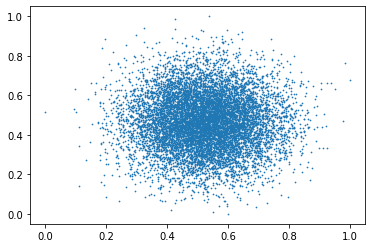

In [6]:
plt.scatter(gaussian_samples.transpose()[0],gaussian_samples.transpose()[1],s=0.5)

In [7]:
train_data=DataLoader(torch.tensor(gaussian_samples).float(),batch_size=batch_size, shuffle=False) 

In [8]:
zdim=2

In [9]:

encoder = Encoder(input_dim=gaussian_samples.shape[1], hidden_dims=[10,10], z_dim=zdim,dropout=0.0)
decoder = Decoder(output_dim=gaussian_samples.shape[1], hidden_dims = [10,10], z_dim=zdim,dropout=0.0)
model = VAE(Encoder=encoder, Decoder=decoder)
optimizer=Adam(model.parameters(),lr=lr)

In [10]:
print("Start training VAE...")
model.train()
model_train(vae_spec=train_data,model=model,optimizer=optimizer,loss_function=loss_function,epochs=epochs,batch_size=batch_size)

Start training VAE...
	Epoch 1 complete! 	Average Loss:  1.403424687241063
Overall Loss:  13893.904403686523
	Epoch 2 complete! 	Average Loss:  1.3980289281979956
Overall Loss:  13840.486389160156
	Epoch 3 complete! 	Average Loss:  1.3971061691130051
Overall Loss:  13831.35107421875
	Epoch 4 complete! 	Average Loss:  1.3966807879823626
Overall Loss:  13827.13980102539
	Epoch 5 complete! 	Average Loss:  1.39389230285028
Overall Loss:  13799.533798217773
	Epoch 6 complete! 	Average Loss:  1.383079420918166
Overall Loss:  13692.486267089844
	Epoch 7 complete! 	Average Loss:  1.38135275021948
Overall Loss:  13675.392227172852
	Epoch 8 complete! 	Average Loss:  1.3806504189847695
Overall Loss:  13668.439147949219
	Epoch 9 complete! 	Average Loss:  1.380303762416647
Overall Loss:  13665.007247924805
	Epoch 10 complete! 	Average Loss:  1.380433420508799
Overall Loss:  13666.29086303711
	Epoch 11 complete! 	Average Loss:  1.3806428913154987
Overall Loss:  13668.364624023438
	Epoch 12 complete!

In [11]:
model.eval()

VAE(
  (Encoder): Encoder(
    (hidden1): Linear(in_features=2, out_features=10, bias=True)
    (hidden2): Linear(in_features=10, out_features=10, bias=True)
    (nn_mu): Linear(in_features=10, out_features=2, bias=True)
    (nn_log_sigma): Linear(in_features=10, out_features=2, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (tanh): Tanh()
    (relu): ReLU()
    (softplus): Softplus(beta=1, threshold=20)
  )
  (Decoder): Decoder(
    (hidden1): Linear(in_features=2, out_features=10, bias=True)
    (hidden2): Linear(in_features=10, out_features=10, bias=True)
    (nn_out): Linear(in_features=10, out_features=2, bias=True)
    (dropout): Dropout(p=0.0, inplace=False)
    (tanh): Tanh()
    (relu): ReLU()
    (sigmoid): Sigmoid()
  )
)

In [12]:
x_recon=model(torch.tensor(gaussian_samples).float())[0].detach().numpy()

In [13]:
z=model(torch.tensor(gaussian_samples).float())[3].detach().numpy()



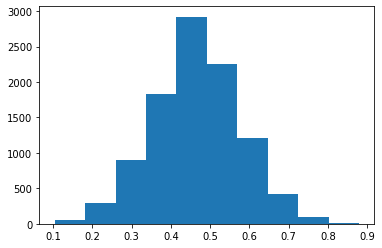

In [14]:
plt.hist(x_recon.transpose()[1])
plt.show()

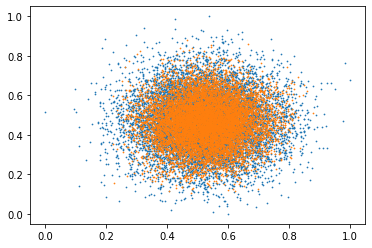

In [31]:
plt.scatter(gaussian_samples.transpose()[0],gaussian_samples.transpose()[1],s=0.5)
plt.scatter(x_recon.transpose()[0],x_recon.transpose()[1],s=0.5)


In [32]:
plt.scatter(z.transpose()[0],z.transpose()[1],s=0.5)

TypeError: transpose() received an invalid combination of arguments - got (), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


# Images

In [17]:
dataset_path = '~/datasets'

batch_size = 100

x_dim  = 784
hidden_dim = 400
latent_dim = 200

lr = 1e-3

epochs = 15

In [18]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


mnist_transform = transforms.Compose([
        transforms.ToTensor(),
])

kwargs = {'num_workers': 1, 'pin_memory': True} 

train_dataset = MNIST(dataset_path, transform=mnist_transform, train=True, download=True)
test_dataset  = MNIST(dataset_path, transform=mnist_transform, train=False, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False, **kwargs)

/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [19]:
encoder = Encoder(input_dim=x_dim, hidden_dims=[hidden_dim,hidden_dim], z_dim=latent_dim,dropout=0.0)
decoder = Decoder(output_dim=x_dim, hidden_dims = [hidden_dim,hidden_dim], z_dim=latent_dim,dropout=0.0)
model = VAE(Encoder=encoder, Decoder=decoder)
optimizer=Adam(model.parameters(),lr=lr)

In [20]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var, z = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        
        overall_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        
    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))
    
print("Finish!!")

Start training VAE...


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 1 complete! 	Average Loss:  146.39727499934787


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 2 complete! 	Average Loss:  96.68734939091193


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 3 complete! 	Average Loss:  85.22389900322152


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 4 complete! 	Average Loss:  80.72442363248643


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 5 complete! 	Average Loss:  77.93269395933326


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 6 complete! 	Average Loss:  76.19381932126461


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 7 complete! 	Average Loss:  74.91872645000782


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 8 complete! 	Average Loss:  73.97359776874218


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 9 complete! 	Average Loss:  73.15018089230749


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 10 complete! 	Average Loss:  72.52130869972089


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 11 complete! 	Average Loss:  71.99261545120774


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 12 complete! 	Average Loss:  71.42784162569126


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 13 complete! 	Average Loss:  70.97495011216611


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 14 complete! 	Average Loss:  70.59084180013565


/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


	Epoch 15 complete! 	Average Loss:  70.17912462339577
Finish!!


#  Show for a few images what is good and what is not.

In [21]:
def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

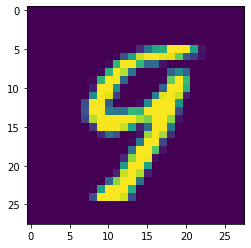

In [27]:
show_image(x, idx=1)


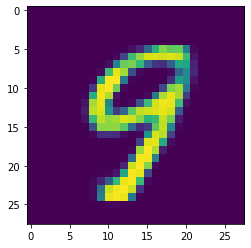

In [29]:
show_image(x_hat.detach(), idx=1)

In [24]:
model.eval()
z1=[]
z2=[]
with torch.no_grad():
    for batch_idx, (x, _) in enumerate(tqdm(test_loader)):
        x = x.view(batch_size, x_dim)
        x = x.to(DEVICE)
        
        x_hat, _, _ ,z= model(x)

        z1.append(z.detach().numpy().transpose()[0])
        z2.append(z.detach().numpy().transpose()[1])

        
z1=np.array(z1).reshape(-1)
z2=np.array(z2).reshape(-1)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/mattocallaghan/miniforge3/envs/astro/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")
100%|██████████| 100/100 [00:02<00:00, 45.58it/s]


In [25]:
z1.shape

(10000,)

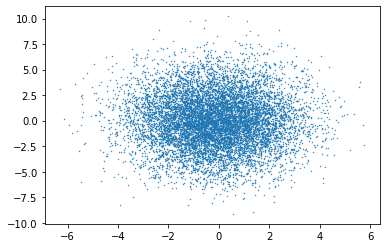

In [26]:
plt.scatter(z1,z2,s=0.2)